# Lab 2
### Convolution - Fourier

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.fftpack.ifft2.html

=> to get log for matrix (element-wise): np.log

=> to get absolute value for matrix (element-wise): np.abs

=> to multiply two matrices (element-wise) : np.multiply

=> to power a matrix (element-wise): np.power

In [1]:
from commonfunctions import *
from skimage.util import random_noise
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

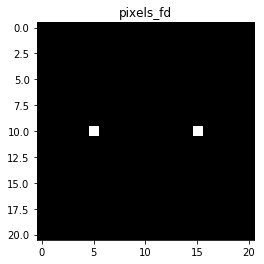

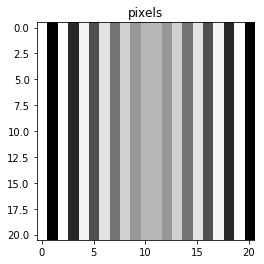

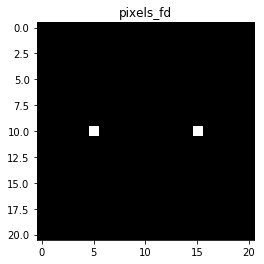

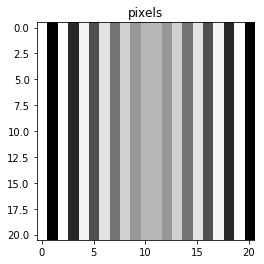

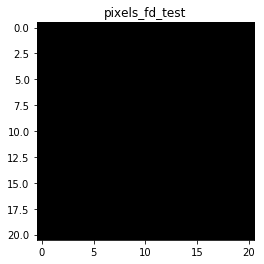

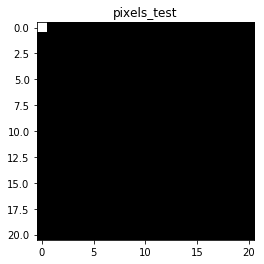

In [8]:
'''
Ex: Fourier Transformation
'''

pixels = np.zeros([21,21])


pixels[10,5] = 1
pixels[10,15] = 1
# pixels[13,10] = 1
show_images([pixels],['pixels_fd'])
pixelsFFT = np.log(np.abs(fftpack.ifft2(pixels))+1)
show_images([pixelsFFT],['pixels'])


pixels = np.zeros([21,21])



pixels[10,5] = 1
pixels[10,15] = 1
show_images([pixels],['pixels_fd'])
pixelsFFT = np.log(np.abs(fftpack.ifft2(pixels))+1)
show_images([pixelsFFT],['pixels'])



pixels = np.ones([21,21])
#pixels[2,5] = 0
#pixels[3,6] = 0
show_images([pixels],['pixels_fd_test'])
pixelsFFT = np.log(np.abs(fftpack.ifft2(pixels))+1)
show_images([pixelsFFT],['pixels_test'])

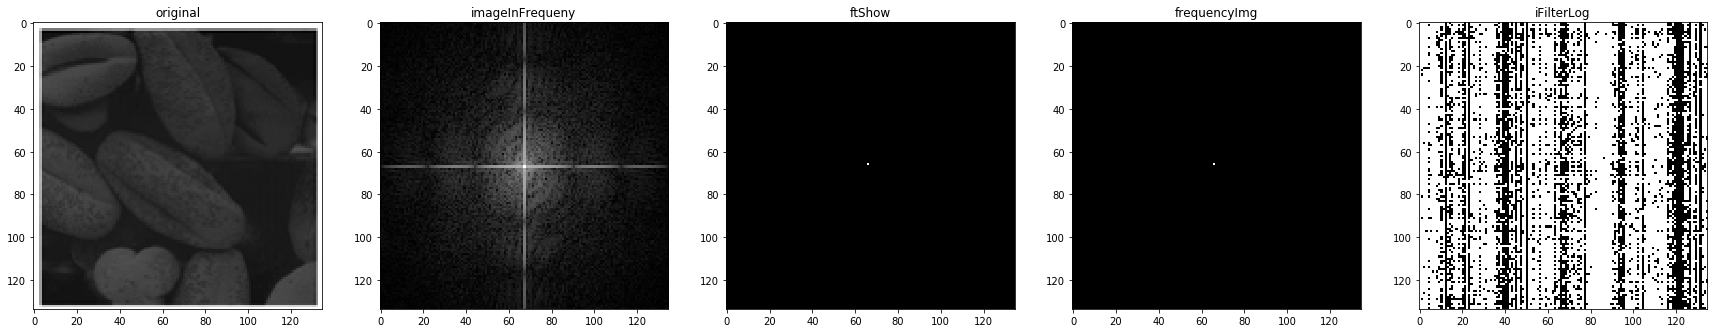

In [25]:
'''
Ex:
'''

def getFtVisualImage(fftimg):
    return np.log  (np.abs(fftimg) +1)
                   
'''

'''

def applyFilterInFrequencyDomain(img,f):
    imgfft = fftpack.fft2(img)
    [iH,iW] = imgfft.shape
    ft = fftpack.fft2(f , imgfft.shape)
    iFilterF = np.multiply(imgfft,ft)
    iFilter = fftpack.ifft2(iFilterF)
    iFilterLog = np.log(np.abs(iFilter)+1)

    show_images([img,getFtVisualImage(fftpack.fftshift(ft)),getFtVisualImage(fftpack.fftshift(iFilterF)),getFtVisualImage(iFilterLog)],['original','ftShow','frequencyImg','iFilterLog'])

def applyFilterInFrequencyDomain_imgOnly(img,ft):
    imgfft = fftpack.fft2(img)
    [iH,iW] = imgfft.shape
    iFilterF = np.multiply(imgfft,ft)
    iFilter = fftpack.ifft2(iFilterF)
    iFilterLog = np.log(np.abs(iFilter)+1)

    show_images([img,getFtVisualImage(fftpack.fftshift(imgfft)),getFtVisualImage(fftpack.fftshift(ft)),getFtVisualImage(fftpack.fftshift(iFilterF)),getFtVisualImage(iFilterLog)],['original','imageInFrequeny','ftShow','frequencyImg','iFilterLog'])

img = rgb2gray(io.imread('imgs/Picture2.png'))
h=w=3
f=(1/9)* np.ones([h,w])
testF = np.zeros_like(img)
testF[testF.shape[0] - 1:testF.shape[0] - 1 + 3,testF.shape[1] - 1:testF.shape[1] - 1 + 3] = 100
applyFilterInFrequencyDomain_imgOnly(img,testF)
#applyFilterInFrequencyDomain(img,f)
f=[
    [1,1,1],
    [1,-8,1],
    [1,1,1]
]
#applyFilterInFrequencyDomain(img,f)

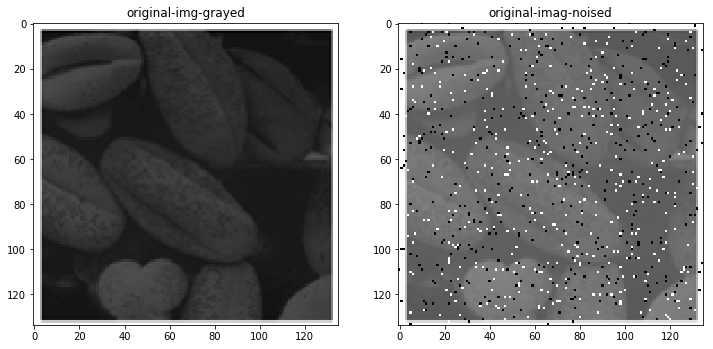

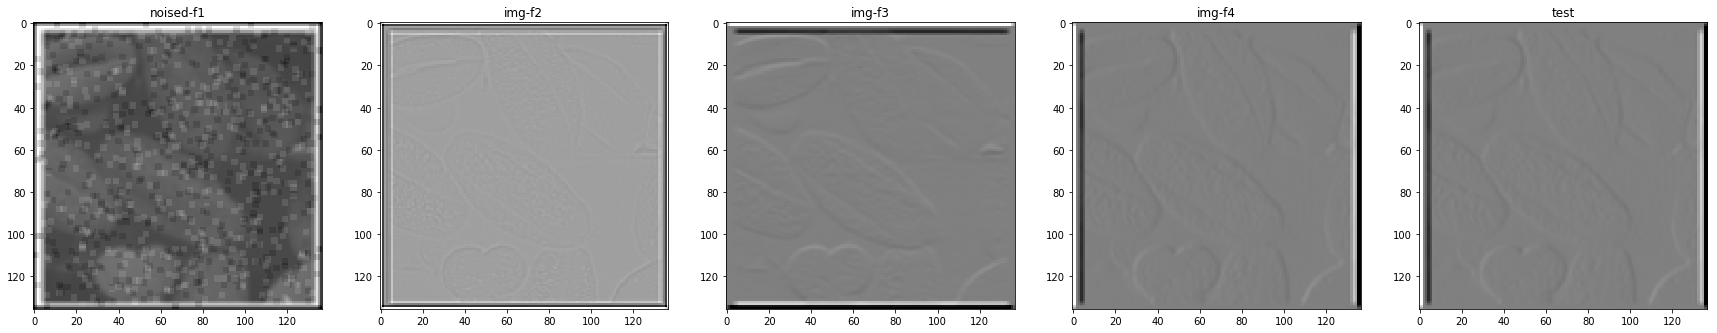

In [11]:
'''
1
Convolution in space domain
You can write the filter as follows:
f = np.array([
               [1,2,3],
               [4,5,6],
               [7,8,9]
             ])

'''
img = rgb2gray(io.imread('imgs/Picture2.png'))
noised = random_noise(img, mode='s&p', amount=0.05)
h=w=3
f1=(1/9)* np.ones([h,w])
# averaging
f2=[
    [1,1,1],
    [1,-8,1],
    [1,1,1]
]
# smoothing, edge detection
f3=[
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
]
# horizontal
f4=[
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
]
# vertivcal
convs = []
convs.append(convolve2d(noised, f1))
convs.append(convolve2d(img, f2))
convs.append(convolve2d(img, f3))
convs.append(convolve2d(img, f4))
test = convolve2d(img, f4)
test = 255*(test - np.min(test))/np.ptp(test).astype(np.uint8)
convs.append(test)
show_images([img, noised], ['original-img-grayed', 'original-imag-noised'])
show_images(convs, ['noised-f1', 'img-f2', 'img-f3', 'img-f4','test'])